In [1]:
import torch
import torch.nn as nn #import neural network class
from torch.utils.data import DataLoader #helps in creating batchs
from torchvision import datasets #download data
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [8]:
## download data
training_data = datasets.FashionMNIST (root="data", train=True, download=True, transform=ToTensor())
testing_data = datasets.FashionMNIST (root="data", train=False, download=True, transform=ToTensor())

In [9]:
len(training_data)

60000

In [11]:
torch.randint(len(training_data),size=(1,)).item()

29941

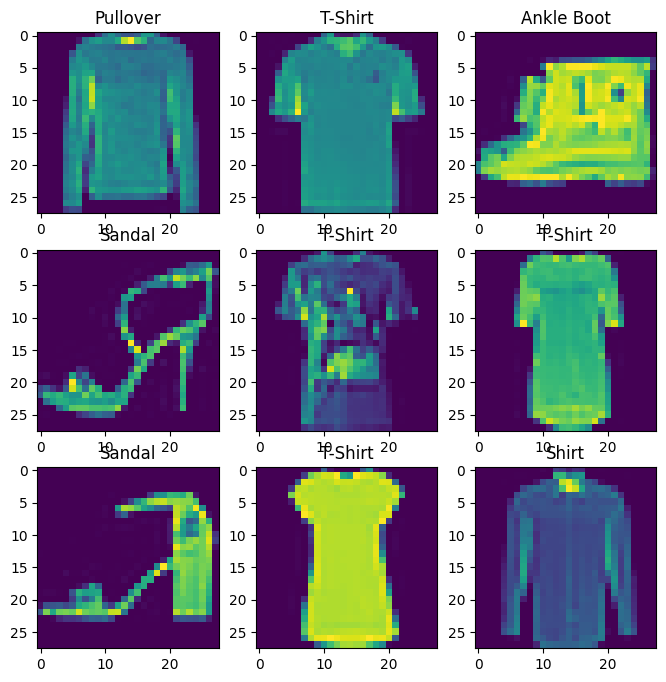

In [12]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",

   }

figure = plt.figure(figsize=(8, 8))

cols, rows = 3,3

for i in range(1,rows*cols+1):
   sample_idx = torch.randint(len(training_data),size=(1,)).item()
   img, label = training_data[sample_idx]
   figure.add_subplot(rows,cols,i)
   plt.title(labels_map[label])
   plt.imshow(img.squeeze())


In [13]:
batch_size=64
train_dataloader=DataLoader(training_data,batch_size=batch_size)
test_dataloader=DataLoader(testing_data,batch_size=batch_size)

##Model creation

In [18]:
class NeuralNetwork(nn.Module): #

  def __init__(self):
    super(NeuralNetwork,self).__init__()

    ## Init function is used to define the architecture blocks
    self.flatten = nn.Flatten() # 28 x 28 x1 - 764 x 1 vectpor
    self.layer1 = nn.Linear(28*28,512)
    self.layer2 = nn.Linear(512,256)
    self.layer3 = nn.Linear(256,10)

  def forward(self,x):
    x = self.flatten(x)
    x = self.layer1(x)
    x = F.relu(x) #F.sigmoid()
    x = self.layer2(x)
    x = F.sigmoid(x)
    x = self.layer3(x)
    return x

In [19]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'


In [29]:
model = NeuralNetwork()
model.to(device)
model

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=512, bias=True)
  (layer2): Linear(in_features=512, out_features=256, bias=True)
  (layer3): Linear(in_features=256, out_features=10, bias=True)
)

##LOSS FUNCTION AND OPTIMIZER

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [31]:
def training_loop(dataloader,model,loss_fn,optimizer):
  model.train()

  #pass every batch of data to the model
  for batch, (X,y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    loss = loss_fn(pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if batch % 100 == 0:
      print (f'loss : {loss.item()}')


In [34]:
## testing the model
def testing_loop(dataloader,model,loss_fn):
  model.eval()
  test_loss = 0
  correct = 0
  for X,y in dataloader:
    X = X.to(device)
    y = y.to(device)

    pred = model(X)
    # print (pred.shape)
    # print (pred)
    # print (pred.argmax(1))
    # print (y)
    # print (pred.argmax(1) == y)
    # print ((pred.argmax(1) == y).type(torch.float))
    # print ((pred.argmax(1) == y).type(torch.float).sum()
    correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss += loss_fn(pred,y).item()
  test_loss = test_loss/len(dataloader)
  print (len(dataloader.dataset))
  accuracy = (correct/len(dataloader.dataset))*100
  print (f'Accuracy : {accuracy} with test error {test_loss}')

In [33]:
epochs = 8 #how many times you have to send data to the model

for t in range(epochs):
  training_loop(train_dataloader,model,loss_fn,optimizer)
  testing_loop(test_dataloader,model,loss_fn)
  print(f' ==================== EPOCH : {t} ============================')

loss : 2.2991766929626465
loss : 2.289900779724121
loss : 2.267322063446045
loss : 2.2503180503845215
loss : 2.1784708499908447
loss : 2.147273302078247
loss : 2.0699269771575928
loss : 1.9604012966156006
loss : 1.838476300239563
loss : 1.706002950668335
10000
Accuracy : 49.24 with test error 1.6679283107162282
 ==================== EPOCH : 0 ============================
loss : 1.7191574573516846
loss : 1.619164228439331
loss : 1.4360154867172241
loss : 1.449712872505188
loss : 1.2623802423477173
loss : 1.297685146331787
loss : 1.2532672882080078
loss : 1.1687886714935303
loss : 1.1935091018676758
loss : 1.1266744136810303
10000
Accuracy : 64.14999999999999 with test error 1.0966799646426157
 ==================== EPOCH : 1 ============================
loss : 1.1720187664031982
loss : 1.1250818967819214
loss : 0.9581497311592102
loss : 1.085365891456604
loss : 0.9435872435569763
loss : 0.9973453283309937
loss : 1.006672739982605
loss : 0.9223974347114563
loss : 0.9528669714927673
loss :